In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

- QB Strength
- Defense Avg Passing Yards Allowed
- Home/Away

In [7]:
# Filter the rows for the seasons 2020, 2021, 2022, and 2023

file_path = 'PlayerStats.csv'  # Update with the correct path
df = pd.read_csv(file_path, low_memory=False)

# Filter the DataFrame for the desired seasons
filtered_df = df[df['season'].isin([2020, 2021, 2022, 2023])]

# Keep only the WR rows
filtered_df = filtered_df[filtered_df['position'] == 'WR']

# Remove rows where players didn't participate in receiving activities (all three are zero)
filtered_df = filtered_df[
    (filtered_df['receiving_yards'] > 0) | 
    (filtered_df['targets'] > 0) | 
    (filtered_df['receptions'] > 0)
]

# Save the filtered data to a new CSV file
filtered_file_path = 'master_receiving_yards.csv'  # Update with the desired save location
filtered_df.to_csv(filtered_file_path, index=False)

# Optionally, print the number of rows saved to confirm
print(f"Filtered data saved with {filtered_df.shape[0]} rows.")


Filtered data saved with 8889 rows.


In [41]:
# Sort the DataFrame by player_display_name, season, and week to ensure correct rolling calculations

import pandas as pd

# Load the dataset
df = pd.read_csv('master_receiving_yards.csv', low_memory=False)

# Sort the DataFrame by player_display_name, season, and week to ensure correct rolling calculations
df = df.sort_values(by=['player_display_name', 'season', 'week'])

# Calculate rolling average for receiving yards over the last 5 games
df['rolling_avg_receiving_yards_5'] = df.groupby('player_display_name')['receiving_yards'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())

# Calculate rolling average for targets over the last 5 games
df['rolling_avg_targets_5'] = df.groupby('player_display_name')['targets'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())

# Calculate rolling average for receptions over the last 5 games
df['rolling_avg_receptions_5'] = df.groupby('player_display_name')['receptions'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())

# Verify the first few rows to ensure calculations are correct
print(df[['player_display_name', 'season', 'week', 'receiving_yards', 'rolling_avg_receiving_yards_5']].head(10))

# Save the DataFrame with rolling averages to a new CSV file
df.to_csv('master_receiving_yards.csv', index=False)
!open master_receiving_yards.csv

     player_display_name  season  week  receiving_yards  \
1720          A.J. Brown    2020     1             39.0   
1721          A.J. Brown    2020     5             82.0   
1722          A.J. Brown    2020     6             58.0   
1723          A.J. Brown    2020     7            153.0   
1724          A.J. Brown    2020     8             24.0   
1725          A.J. Brown    2020     9            101.0   
1726          A.J. Brown    2020    10             21.0   
1727          A.J. Brown    2020    11             62.0   
1728          A.J. Brown    2020    12             98.0   
1729          A.J. Brown    2020    13             87.0   

      rolling_avg_receiving_yards_5  
1720                      39.000000  
1721                      60.500000  
1722                      59.666667  
1723                      83.000000  
1724                      71.200000  
1725                      83.600000  
1726                      71.400000  
1727                      72.200000  
1728    

In [42]:
# # Prepare Your Dataset

# # Load your dataset
# df = pd.read_csv('master_receiving_yards.csv')

# # Features: select relevant columns, adjust as necessary
# features = [
#     'opponent_defense_strength',  # Example feature
#     'wr_target_share',
#     'team_offense_rating',
#     'weather_condition',          # Categorical feature (you might need to encode it)
#     'home_away',                  # Categorical feature (you might need to encode it)
#     'previous_game_receiving_yards',
#     'recent_performance_rating'
#     # Add more features as necessary
# ]

# # Target variable
# target = 'receiving_yards'

# # Split the data into features (X) and target (y)
# X = df[features]
# y = df[target]

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# # Train the XGBoost Model

# # Convert the datasets into DMatrix format (optimized for XGBoost)
# train_data = xgb.DMatrix(X_train, label=y_train)
# test_data = xgb.DMatrix(X_test, label=y_test)

# # Set parameters for XGBoost
# params = {
#     'objective': 'reg:squarederror',  # Regression task
#     'eval_metric': 'rmse',
#     'max_depth': 6,
#     'eta': 0.1,
#     'subsample': 0.8,
#     'colsample_bytree': 0.8,
#     'seed': 42
# }

# # Train the model
# model = xgb.train(params, train_data, num_boost_round=100)

# # Make predictions on the test set
# predictions = model.predict(test_data)

# # Evaluate the model
# mse = mean_squared_error(y_test, predictions)
# print(f"Mean Squared Error: {mse}")


In [ ]:
# # Predict Upcoming Games
# # You can use the trained model to predict receiving yards for upcoming games.

# # Assume you have a dataset for upcoming games
# upcoming_games_df = pd.read_csv('UpcomingGames.csv')

# # Prepare the data in the same way you did for training
# X_upcoming = upcoming_games_df[features]

# # Convert the dataset into DMatrix format
# upcoming_data = xgb.DMatrix(X_upcoming)

# # Make predictions
# upcoming_predictions = model.predict(upcoming_data)

# # Add the predictions to the DataFrame
# upcoming_games_df['predicted_receiving_yards'] = upcoming_predictions

# # Save or display the results
# print(upcoming_games_df[['PlayerName', 'predicted_receiving_yards']])


Mean Squared Error: 406.14138717000577


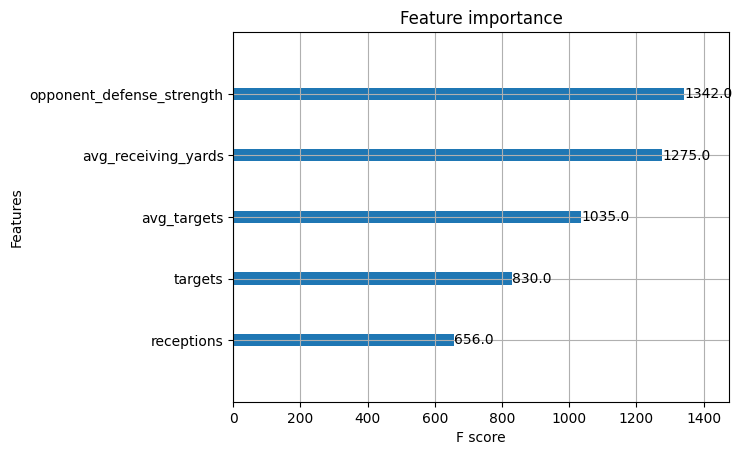

In [35]:
# All together w/ Features

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('master_receiving_yards.csv')

# Feature Engineering
df['avg_receiving_yards'] = df.groupby('player_display_name')['receiving_yards'].transform('mean')
df['avg_targets'] = df.groupby('player_display_name')['targets'].transform('mean')

# Features to use
features = [
    'avg_receiving_yards',
    'avg_targets',
    'opponent_defense_strength',
    'receptions',
    'targets'
]

# Target variable
target = 'receiving_yards'

# Drop rows with missing target values (if any)
df = df.dropna(subset=[target])

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]

# Standardize key features
# scaler = StandardScaler()
# X[['avg_receiving_yards', 'avg_targets', 'receptions', 'targets']] = scaler.fit_transform(X[['avg_receiving_yards', 'avg_targets', 'receptions', 'targets']])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the datasets into DMatrix format (optimized for XGBoost)
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train the model
model = xgb.train(params, train_data, num_boost_round=100)

# Make predictions on the test set
predictions = model.predict(test_data)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Plot feature importance
xgb.plot_importance(model)
plt.show()

In [37]:
# Run the model for upcoming week

df = pd.read_csv('PlayerStats.csv', low_memory=False)

# Filter for the upcoming games: season 2024, week 1
upcoming_week_df = df[(df['season'] == 2024) & (df['week'] == 1)]

# Apply the same filters as used for training
upcoming_week_df = upcoming_week_df[upcoming_week_df['position'] == 'WR']  # Keep only WRs
# upcoming_week_df = upcoming_week_df[
#     (upcoming_week_df['receiving_yards'] > 0) | 
#     (upcoming_week_df['targets'] > 0) | 
#     (upcoming_week_df['receptions'] > 0)
# ]

# Calculate historical averages for players with previous seasons' data
# historical_df = df[df['season'].isin([2020, 2021, 2022, 2023])]
# upcoming_week_df['avg_receiving_yards'] = upcoming_week_df['player_display_name'].map(
#     historical_df.groupby('player_display_name')['receiving_yards'].mean()
# )
# upcoming_week_df['avg_targets'] = upcoming_week_df['player_display_name'].map(
#     historical_df.groupby('player_display_name')['targets'].mean()
# )

# Feature Engineering for the upcoming week
upcoming_week_df['avg_receiving_yards'] = upcoming_week_df.groupby('player_display_name')['receiving_yards'].transform('mean')
upcoming_week_df['avg_targets'] = upcoming_week_df.groupby('player_display_name')['targets'].transform('mean')

# Set default values (league-wide averages or conservative estimates)
default_avg_receiving_yards = 30  # League-wide or positional average
default_avg_targets = 4  # League-wide or positional average
default_receptions = 2  # Conservative estimate or league-wide average
default_targets = 4  # Conservative estimate or league-wide average

# Fill missing values with defaults
upcoming_week_df['avg_receiving_yards'].fillna(default_avg_receiving_yards, inplace=True)
upcoming_week_df['avg_targets'].fillna(default_avg_targets, inplace=True)
upcoming_week_df['receptions'].fillna(default_receptions, inplace=True)
upcoming_week_df['targets'].fillna(default_targets, inplace=True)

# Standardize key features
# scaler = StandardScaler()
# upcoming_week_df[['avg_receiving_yards', 'avg_targets', 'receptions', 'targets']] = scaler.fit_transform(
#     upcoming_week_df[['avg_receiving_yards', 'avg_targets', 'receptions', 'targets']]
# )

# Features to use (same as those used during training)
features = [
    'avg_receiving_yards',
    'avg_targets',
    'opponent_defense_strength',
    'receptions',
    'targets'
]

# Prepare the data for prediction
X_upcoming = upcoming_week_df[features]

# Convert the data into DMatrix format for XGBoost
upcoming_data = xgb.DMatrix(X_upcoming)

# Use the pre-trained model to predict the upcoming week's receiving yards
upcoming_predictions = model.predict(upcoming_data)

# Add the predictions back to the DataFrame
upcoming_week_df['predicted_receiving_yards'] = upcoming_predictions

# Save the results
upcoming_week_df.to_csv('predicted_receiving_yards_upcoming_week.csv', index=False)

# Optionally, display the first few rows of the prediction
print(upcoming_week_df[['player_display_name', 'predicted_receiving_yards']])
!open predicted_receiving_yards_upcoming_week.csv

       player_display_name  predicted_receiving_yards
123192        Adam Thielen                  27.795036
123362        Keenan Allen                  27.896568
123396        Robert Woods                  28.339445
123464     DeAndre Hopkins                  26.483894
123753   Odell Beckham Jr.                  27.923424
...                    ...                        ...
168327        Keon Coleman                  28.862719
168344       Ladd McConkey                  27.137184
168395      Malachi Corley                  20.224855
168565    Malik Washington                  27.923424
168633       Xavier Worthy                  27.207458

[361 rows x 2 columns]


/var/folders/hd/r4k9j4m15vd1bc_tnk5pn5_c0000gn/T/ipykernel_9925/259551905.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  upcoming_week_df['avg_receiving_yards'].fillna(default_avg_receiving_yards, inplace=True)
/var/folders/hd/r4k9j4m15vd1bc_tnk5pn5_c0000gn/T/ipykernel_9925/259551905.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obj

Team Passing Efficiency:

The team passing efficiency (passing yards per attempt) has an average of around 7.06, with a standard deviation of 4.11. The presence of negative values suggests there may be data entry issues or that some attempts had zero passing yards, which should be addressed.


Rolling Averages: Implement rolling averages for receiving yards, targets, and receptions over the last 3 to 5 games to capture a player’s recent performance trends.
